In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
#plt.style.use(mplhep.style.CMS)

In [2]:
#proton_selection = "SingleRP"
proton_selection = "MultiRP"

# Signal

In [3]:
df_signal = None
event_counts_signal = None
selections_str_signal = None
#with h5py.File('output/output-MC2017-Elastic-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-Elastic-ExclSel.h5', 'r') as f:
with h5py.File('output/output-MC2017-SingleDissociation-PreSel.h5', 'r') as f:
#with h5py.File('output/output-MC2017-SingleDissociation-ExclSel.h5', 'r') as f:    
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts_signal = list( dset_counts )
    print ( event_counts_signal )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str_signal = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str_signal )
    
    df_signal = pd.DataFrame( dset, columns=columns_str )
    
    print ( df_signal )

['columns', 'event_counts', 'protons', 'selections']
(131455, 38)
[[1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 2.18745663e-04
  1.11441655e-01 1.88330499e-03]
 [1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 2.18745663e-04
  1.11441655e-01 1.88330499e-03]
 [1.00000000e+00 1.00000000e+00 4.29496730e+09 ... 2.18745663e-04
  1.11441655e-01 1.88330499e-03]
 ...
 [1.00000000e+00 2.25000000e+02 4.29496730e+09 ... 1.93572367e-03
  7.67421414e-02 3.88485338e-03]
 [1.00000000e+00 2.25000000e+02 4.29496730e+09 ... 1.93572367e-03
  7.67421414e-02 3.88485338e-03]
 [1.00000000e+00 2.25000000e+02 4.29496730e+09 ... 1.93572367e-03
  7.67421414e-02 3.88485338e-03]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon0

In [4]:
df_counts_signal = pd.Series( event_counts_signal, index=selections_str_signal);
df_counts_signal

All        178174
Muon       169697
Vertex     158616
Protons     56318
dtype: int64

In [5]:
msk_invmass = ( df_signal["InvMass"] >= 110. )
df_signal = df_signal[msk_invmass]
df_signal

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,1.0,1.0,4.294967e+09,3.0,-999.0,0.0,-999.0,3.0,-1.0,12.739258,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305266,1.0,0.000219,0.111442,0.001883
1,1.0,1.0,4.294967e+09,3.0,-999.0,0.0,-999.0,23.0,-1.0,12.846436,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305266,1.0,0.000219,0.111442,0.001883
2,1.0,1.0,4.294967e+09,3.0,-999.0,1.0,0.0,3.0,23.0,12.739258,...,90.351357,2.261688,1.928109,0.428011,0.424056,188.305266,1.0,0.000219,0.111442,0.001883
3,1.0,1.0,4.294967e+09,16.0,-999.0,0.0,-999.0,123.0,-1.0,2.177063,...,84.741302,-0.804569,1.585272,0.786427,0.783221,171.209068,0.0,0.002544,0.005162,0.033602
4,1.0,1.0,4.294967e+09,15.0,-999.0,0.0,-999.0,23.0,-1.0,2.218964,...,54.763481,-1.060142,-1.017995,-3.671344,-3.675518,225.314067,0.0,0.002158,0.023009,0.013057
5,1.0,1.0,4.294967e+09,17.0,-999.0,0.0,-999.0,3.0,-1.0,2.789307,...,77.358459,-1.278425,-1.259489,4.341810,4.341201,288.467135,6.0,0.698762,0.026775,0.023218
6,1.0,1.0,4.294967e+09,17.0,-999.0,0.0,-999.0,23.0,-1.0,2.902161,...,77.358459,-1.278425,-1.259489,4.341810,4.341201,288.467135,6.0,0.698762,0.026775,0.023218
7,1.0,1.0,4.294967e+09,20.0,-999.0,0.0,-999.0,103.0,-1.0,3.240234,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306463,0.0,0.036674,0.006029,0.060007
8,1.0,1.0,4.294967e+09,20.0,-999.0,0.0,-999.0,123.0,-1.0,3.087982,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306463,0.0,0.036674,0.006029,0.060007
9,1.0,1.0,4.294967e+09,20.0,-999.0,1.0,1.0,103.0,123.0,3.240234,...,115.335823,-1.117552,-2.905547,-2.884175,-2.886598,246.306463,0.0,0.036674,0.006029,0.060007


In [6]:
df_signal_events = df_signal.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_signal_events = df_signal_events[ ~df_signal_events.index.duplicated(keep='first') ]

#msk_invmass = ( df_signal_events["InvMass"] >= 110. )
#df_signal_events = df_signal_events[msk_invmass]

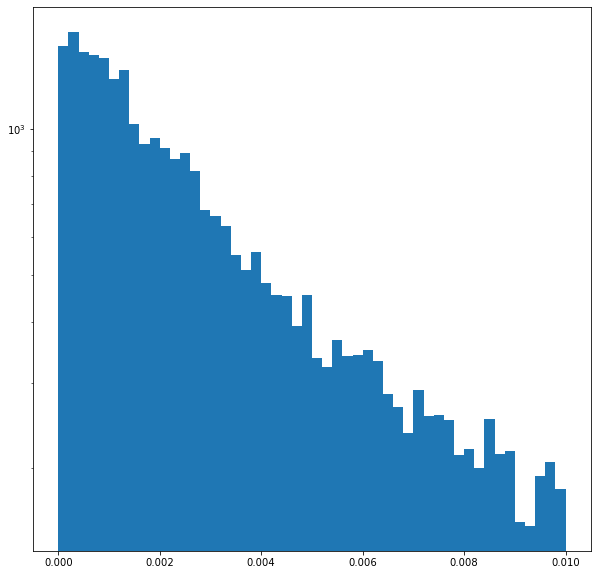

In [7]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["Acopl"], bins=50, range=(0.,0.01) )
plt.yscale( "log" )

(array([29272., 10928.,  4795.,  2545.,  1429.,  1011.,   718.,   549.,
          404.,   317.,   244.,   192.,   135.,   106.,   119.,   102.,
           74.,    79.,    64.,   115.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

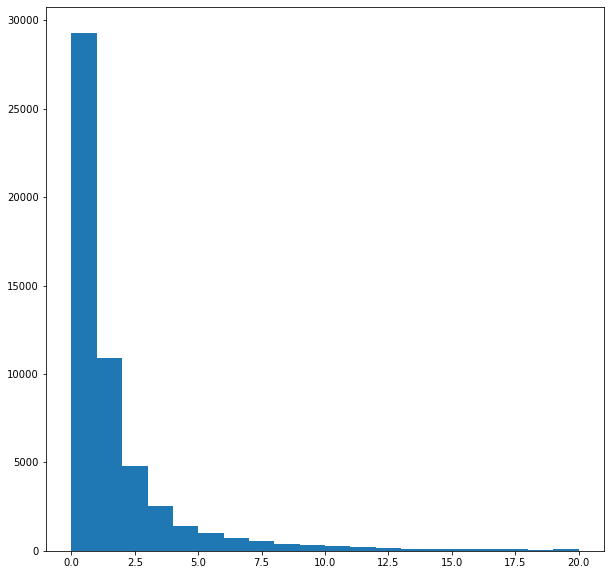

In [8]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["ExtraPfCands"], bins=20, range=(0.,20) )
#plt.yscale( "log" )

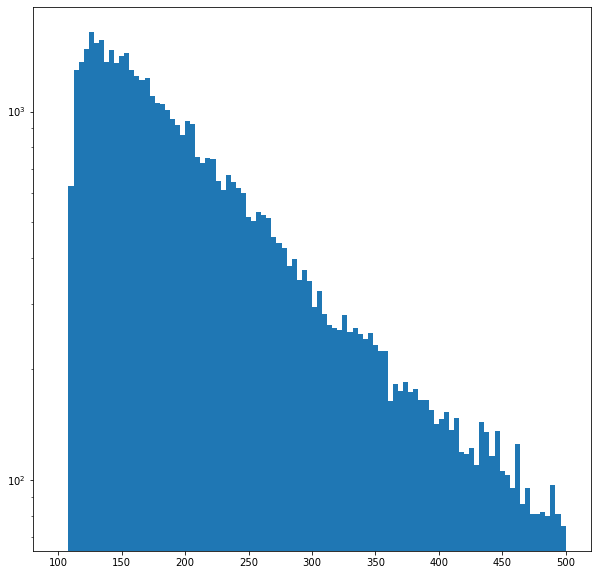

In [9]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["InvMass"], bins=100, range=(100.,500) )
plt.yscale( "log" )

6363 6051


(0.0, 0.15)

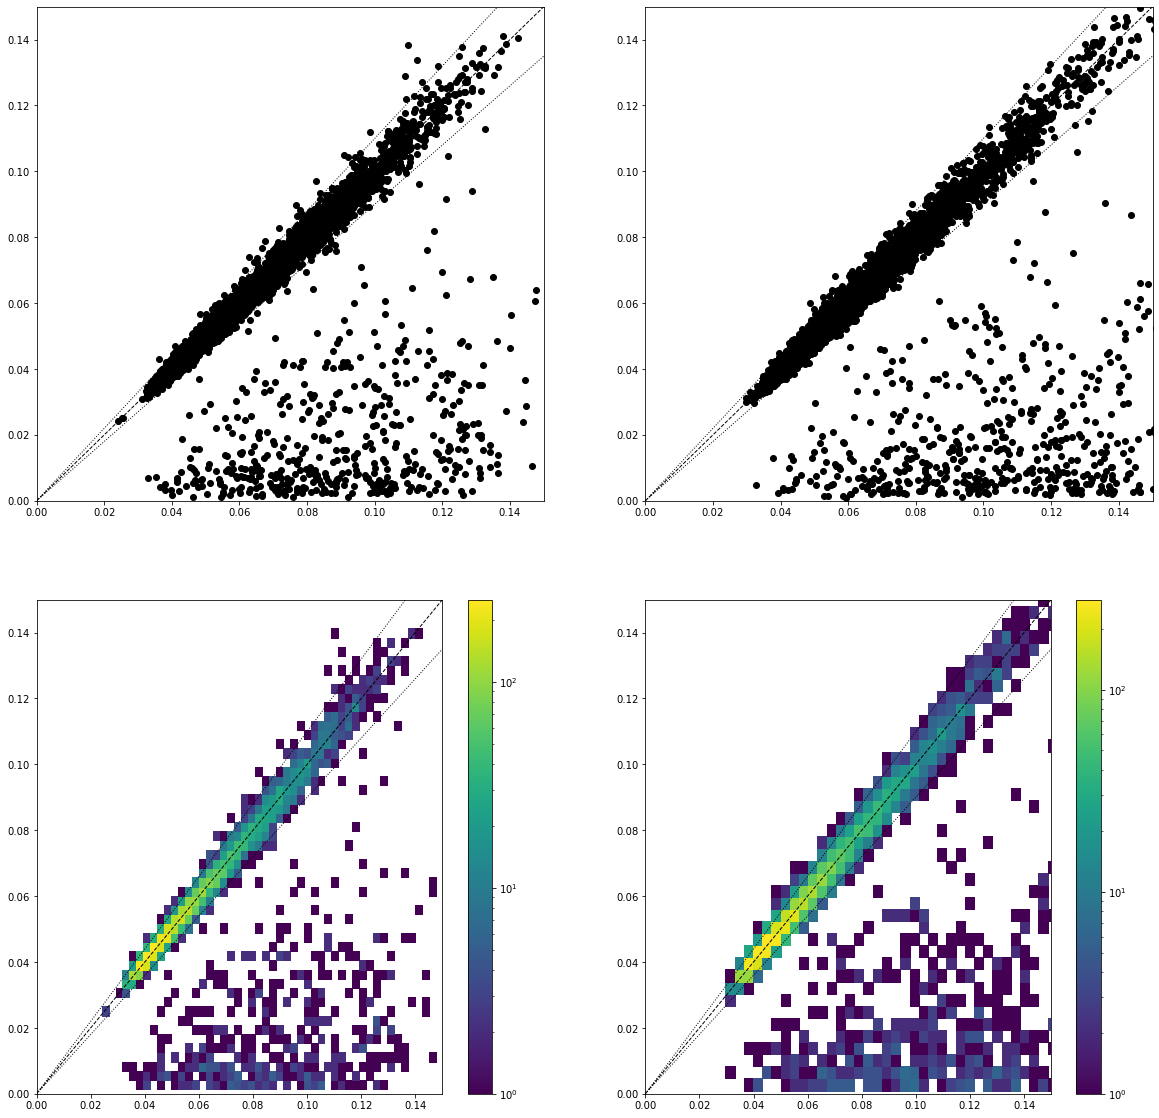

In [10]:
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
#msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 0 )

#msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
#msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

msk1 = None
msk2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

(array([1.000e+01, 4.000e+00, 4.000e+00, 5.000e+00, 6.000e+00, 3.000e+00,
        8.000e+00, 9.000e+00, 1.000e+01, 7.000e+00, 1.100e+01, 6.000e+00,
        6.000e+00, 7.000e+00, 4.000e+00, 9.000e+00, 1.100e+01, 7.000e+00,
        6.000e+00, 1.300e+01, 8.000e+00, 1.200e+01, 1.000e+01, 1.100e+01,
        1.000e+01, 6.000e+00, 1.700e+01, 7.000e+00, 7.000e+00, 3.000e+00,
        1.033e+03, 4.442e+03, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([-5.  , -4.84, -4.68, -4.52, -4.36, -4.2 , -4.04, -3.88, -3.72,
        -3.56, -3.4 , -3.24, -3.08, -2.92, -2.76, -2.6 , -2.44, -2.28,
        -2.12, -1.96, -1.8 , -1.64, -1.48, -1.32, -1.16, -1.  , -0.84,
        -0.68, -0.52, -0.36, -0.2 , -0.04,  0.12,  0.28,  0.44,  0.6 ,
         0.76,  0.92,  1.08,  1.24,  1.4 ,  1.56,  1.72,  1.88,  2.04,
         2.2 ,  2.36,

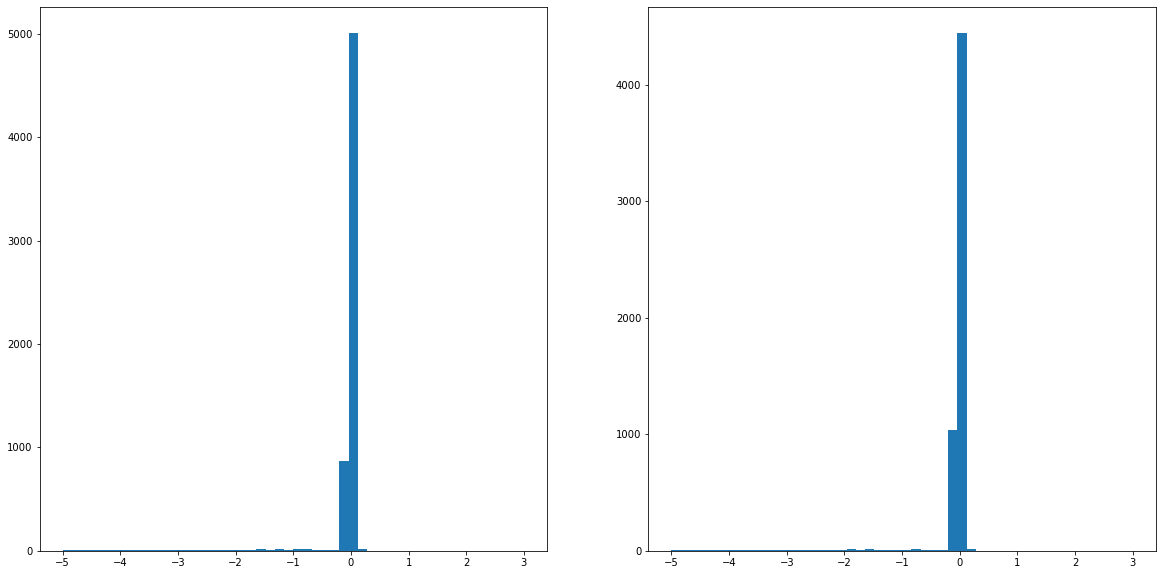

In [11]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( ( 1. - df_signal[ "Xi" ][ msk1 ] / df_signal[ "XiMuMuPlus" ][ msk1 ] ), bins=50, range=(-5.,3.) )
axes[1].hist( ( 1. - df_signal[ "Xi" ][ msk2 ] / df_signal[ "XiMuMuMinus" ][ msk2 ] ), bins=50, range=(-5.,3.) )

# Data

In [12]:
df_data_list = []
df_counts_data_list = []

#resample_factor = 1
#resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017B-Excl.h5', 'r') as f:    
#with h5py.File('output/output-UL2017C1-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-Excl.h5', 'r') as f:

fileNames = [
    'output/output-UL2017B-PreSel.h5',
    'output/output-UL2017C1-PreSel.h5',
    'output/output-UL2017D-PreSel.h5',
    'output/output-UL2017F1-PreSel.h5'
]

for file_ in fileNames:
    with h5py.File( file_, 'r' ) as f:
        print ( f )
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )  
        
        dset_counts = f['event_counts']
        df_counts_data_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_data_list[-1] )
        
        chunk_size = 1000000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_data_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
            print ( df_data_list[-1].head() )
            print ( len( df_data_list[-1] ) )
        

<HDF5 file "output-UL2017B-PreSel.h5" (mode r)>
['columns', 'event_counts', 'protons', 'selections']
(107075, 38)
[[2.97227000e+05 5.30000000e+01 2.29700000e+03 ... 9.83012105e-01
  5.61954090e-02 4.09129155e-03]
 [2.97227000e+05 5.50000000e+01 8.67000000e+02 ... 1.32611728e-01
  1.95323438e-03 4.83462101e-02]
 [2.97227000e+05 5.50000000e+01 8.67000000e+02 ... 1.32611728e-01
  1.95323438e-03 4.83462101e-02]
 ...
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'T

All        10098040
Muon          92900
Vertex        86604
Protons       69511
dtype: int64
[0]
[250071]
0 250071
        Run  LumiSection      BX   EventNum  CrossingAngle  MultiRP    Arm  \
0  302031.0          1.0  3318.0   431887.0          150.0      0.0 -999.0   
1  302031.0          1.0  3318.0   431887.0          150.0      0.0 -999.0   
2  302031.0          1.0  3318.0   431887.0          150.0      0.0 -999.0   
3  302031.0          1.0  1308.0  1151281.0          150.0      0.0 -999.0   
4  302031.0          1.0  1308.0  1151281.0          150.0      0.0 -999.0   

   RPId1  RPId2    TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0   23.0   -1.0   6.012390  ...  55.336308 -0.149625  1.593971   1.844915   
1   23.0   -1.0   7.552979  ...  55.336308 -0.149625  1.593971   1.844915   
2   23.0   -1.0  12.666504  ...  55.336308 -0.149625  1.593971   1.844915   
3   23.0   -1.0   7.412109  ...  50.115246 -1.854188  2.954947  -3.693869   
4   23.0   -1.0  10.405884  ...

In [13]:
df_data = pd.concat( df_data_list )

In [14]:
df_data

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227.0,53.0,2297.0,36577201.0,120.0,0.0,-999.0,123.0,-1.0,2.333649,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
1,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,103.0,-1.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
2,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,123.0,-1.0,4.395691,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
3,297227.0,55.0,867.0,38079658.0,120.0,1.0,1.0,103.0,123.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
4,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,103.0,-1.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
5,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,123.0,-1.0,8.483521,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
6,297227.0,56.0,1102.0,38791639.0,120.0,1.0,1.0,103.0,123.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
7,297227.0,56.0,378.0,38604580.0,120.0,0.0,-999.0,3.0,-1.0,4.131104,...,70.969543,-1.393078,-2.552279,1.891896,1.899735,90.916580,28.0,0.588286,0.003354,0.038210
8,297227.0,56.0,378.0,38604580.0,120.0,0.0,-999.0,23.0,-1.0,4.206665,...,70.969543,-1.393078,-2.552279,1.891896,1.899735,90.916580,28.0,0.588286,0.003354,0.038210
9,297227.0,56.0,378.0,38604580.0,120.0,0.0,-999.0,103.0,-1.0,3.514526,...,70.969543,-1.393078,-2.552279,1.891896,1.899735,90.916580,28.0,0.588286,0.003354,0.038210


In [15]:
df_counts_data = df_counts_data_list[0];
for idx in range( 1, len(df_counts_data_list) ):
    df_counts_data = df_counts_data.add( df_counts_data_list[idx] )
df_counts_data

All        31108565
Muon         308240
Vertex       285916
Protons      223649
dtype: int64

In [16]:
msk_invmass = ( df_data["InvMass"] >= 110. )
df_data = df_data[msk_invmass]
df_data

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
1,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,103.0,-1.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
2,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,123.0,-1.0,4.395691,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
3,297227.0,55.0,867.0,38079658.0,120.0,1.0,1.0,103.0,123.0,4.577393,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
4,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,103.0,-1.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
5,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,123.0,-1.0,8.483521,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
6,297227.0,56.0,1102.0,38791639.0,120.0,1.0,1.0,103.0,123.0,8.585938,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
18,297227.0,59.0,1091.0,41195314.0,120.0,0.0,-999.0,3.0,-1.0,6.081787,...,53.397972,0.351230,1.455985,1.699705,1.701242,115.758900,30.0,0.476683,0.007220,0.015363
19,297227.0,59.0,1091.0,41195314.0,120.0,0.0,-999.0,23.0,-1.0,3.370850,...,53.397972,0.351230,1.455985,1.699705,1.701242,115.758900,30.0,0.476683,0.007220,0.015363
23,297227.0,60.0,2102.0,41478175.0,120.0,0.0,-999.0,123.0,-1.0,2.562836,...,93.884605,-0.780826,-1.171839,-2.750041,-2.746576,323.668558,40.0,0.157789,0.035037,0.018197
37,297227.0,71.0,517.0,50687027.0,120.0,0.0,-999.0,3.0,-1.0,5.214844,...,113.611771,-1.225648,2.078576,3.568076,3.565264,270.992400,27.0,0.016921,0.010428,0.041786


In [17]:
df_data_events = df_data.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_data_events = df_data_events[ ~df_data_events.index.duplicated(keep='first') ]
#msk_invmass = ( df_data_events["InvMass"] >= 110. )
#df_data_events = df_data_events[msk_invmass]
print ( len( df_data_events ) )

97746


(array([6393., 6085., 5431., 5033., 4513., 4027., 3779., 3301., 3085.,
        2794., 2528., 2426., 2089., 2016., 1797., 1663., 1533., 1491.,
        1344., 1276., 1257., 1128., 1075., 1030.,  923.,  927.,  896.,
         794.,  818.,  720.,  788.,  677.,  650.,  609.,  588.,  559.,
         555.,  575.,  508.,  544.,  490.,  464.,  449.,  398.,  434.,
         406.,  389.,  383.,  363.,  377.]),
 array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
        0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
        0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
        0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
        0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
        0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  ]),
 <a list of 50 Patch objects>)

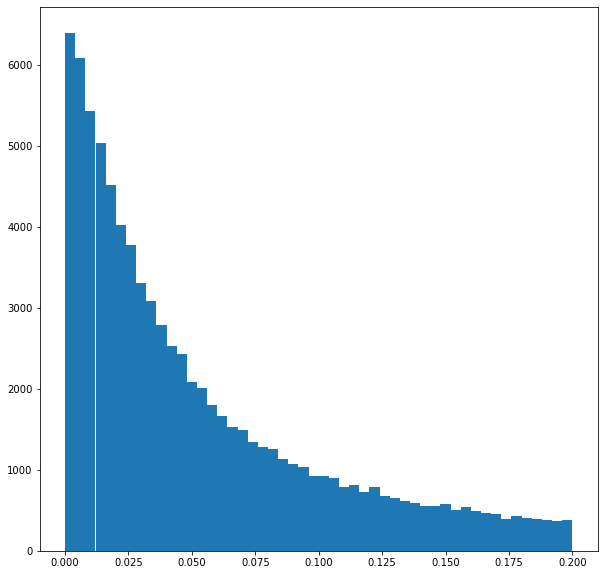

In [18]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.yscale( "log" )

(array([ 254.,  199.,  275.,  385.,  457.,  549.,  652.,  752.,  855.,
         919.,  993., 1074., 1170., 1262., 1307., 1368., 1483., 1561.,
        1522., 1690., 1647., 1740., 1646., 1796., 1791., 1863., 1834.,
        1845., 1850., 3787.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

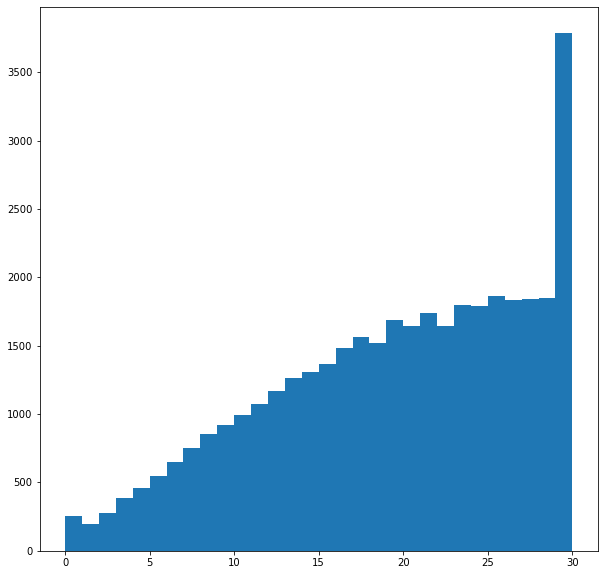

In [19]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.yscale( "log" )

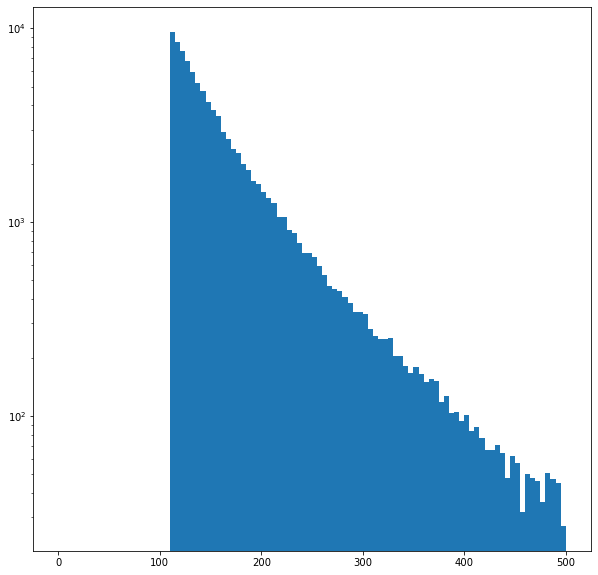

In [20]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500) )
plt.yscale( "log" )

57 67


(0.0, 0.15)

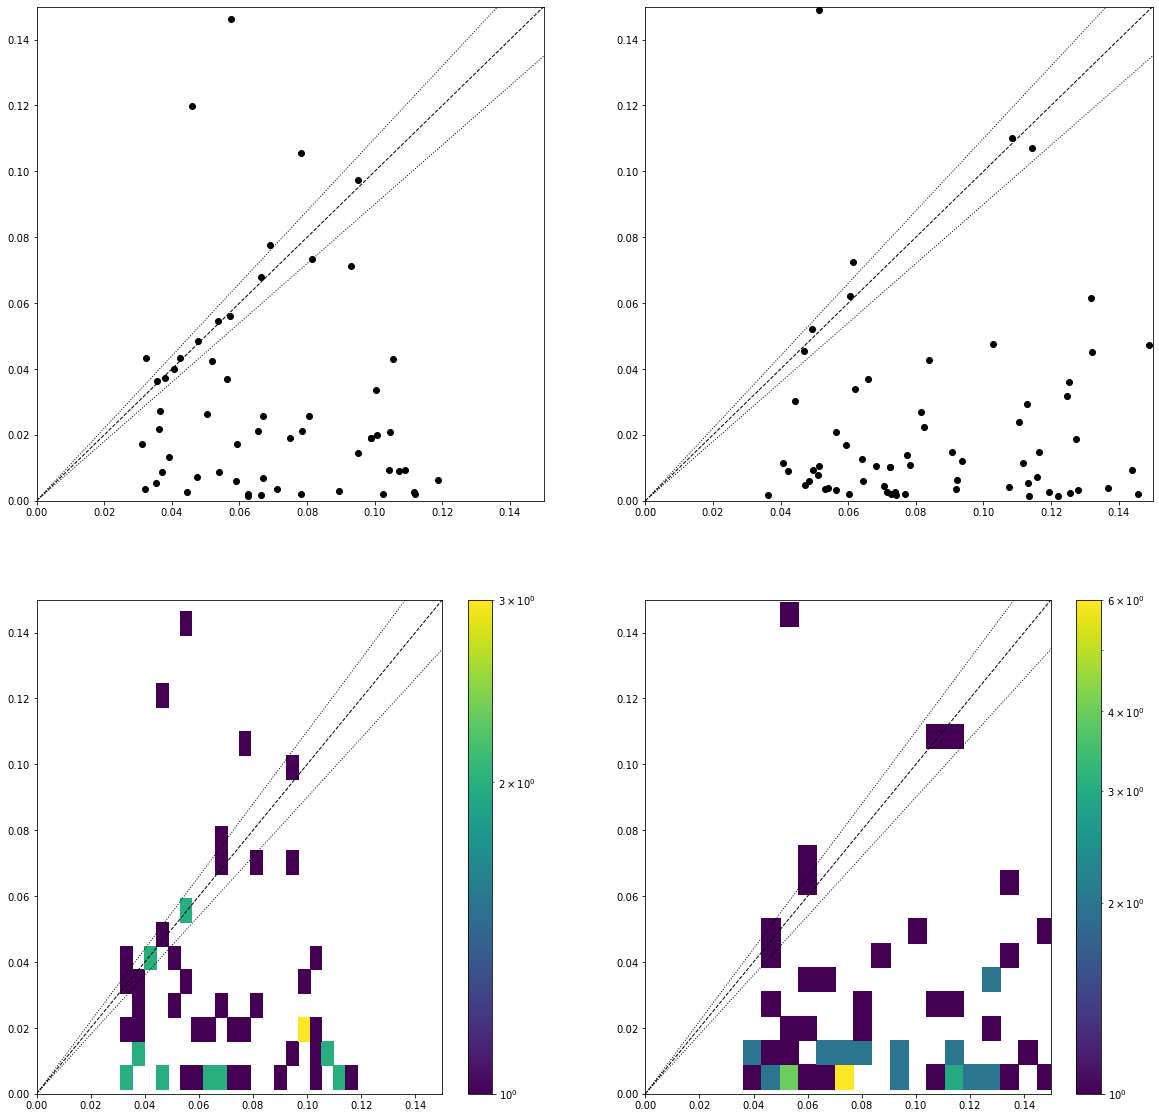

In [21]:
msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
#msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 0 )
#msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] > 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

#msk1 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 23 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 123 )
#msk1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

In [22]:
df_bkg_list = []
df_counts_bkg_list = []

resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel-Rnd-Res20.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-PreSel-Rnd-Res20.h5', 'r') as f:    

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017D-PreSel-Rnd-Res20.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]

for file_ in fileNames_bkg:
    with h5py.File( file_, 'r' ) as f:
        print ( file_ )    
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )
        
        dset_counts = f['event_counts']
        df_counts_bkg_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_bkg_list[-1] )
       
        chunk_size = 1000000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_bkg_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
            print ( df_bkg_list[-1].head() )
            print ( len( df_bkg_list[-1] ) )
    

output/output-UL2017B-PreSel-Rnd-Res20.h5
['columns', 'event_counts', 'protons', 'selections']
(2141500, 38)
[[2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 [2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 [2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 ...
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2

        Run  LumiSection      BX      EventNum  CrossingAngle  MultiRP    Arm  \
0  300122.0        831.0   694.0  1.140814e+09          130.0      1.0    1.0   
1  300122.0        831.0  2636.0  1.139587e+09          130.0      0.0 -999.0   
2  300122.0        831.0  2636.0  1.139587e+09          130.0      0.0 -999.0   
3  300122.0        831.0  2636.0  1.139587e+09          130.0      1.0    0.0   
4  300122.0        833.0  2741.0  1.143063e+09          130.0      0.0 -999.0   

   RPId1  RPId2    TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0  103.0  123.0  11.086426  ...  57.520668 -1.334484  0.473700  -6.338616   
1    3.0   -1.0  10.473633  ...  50.131271  0.305793 -0.915794  -1.886005   
2   23.0   -1.0  10.468628  ...  50.131271  0.305793 -0.915794  -1.886005   
3    3.0   23.0  10.473633  ...  50.131271  0.305793 -0.915794  -1.886005   
4    3.0   -1.0   6.382812  ...  65.101822  1.873162  1.452313   4.929261   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl

        Run  LumiSection      BX    EventNum  CrossingAngle  MultiRP    Arm  \
0  302553.0         12.0   687.0  14468791.0          150.0      0.0 -999.0   
1  302553.0         12.0   687.0  14468791.0          150.0      0.0 -999.0   
2  302553.0         12.0  3313.0  15393080.0          150.0      0.0 -999.0   
3  302553.0         12.0  3313.0  15393080.0          150.0      0.0 -999.0   
4  302553.0         12.0  3313.0  15393080.0          150.0      0.0 -999.0   

   RPId1  RPId2    TrackX1  ...    Muon1Pt  Muon1Eta  Muon1Phi  Muon1VtxZ  \
0  123.0   -1.0   6.719910  ...  57.312408 -1.024868 -1.930395  -1.752438   
1  123.0   -1.0   8.742798  ...  57.312408 -1.024868 -1.930395  -1.752438   
2   23.0   -1.0   5.922119  ...  60.119541 -0.092510 -1.239896  -1.298857   
3   23.0   -1.0  10.329834  ...  60.119541 -0.092510 -1.239896  -1.298857   
4   23.0   -1.0  11.959351  ...  60.119541 -0.092510 -1.239896  -1.298857   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus 

In [23]:
df_bkg = pd.concat( df_bkg_list )

In [24]:
df_bkg

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227.0,53.0,2759.0,36430301.0,120.0,0.0,-999.0,23.0,-1.0,9.954590,...,54.994999,0.252747,-2.969282,-4.387092,-4.388010,91.897397,26.0,0.592593,0.010987,0.012259
1,297227.0,53.0,2759.0,36430301.0,120.0,0.0,-999.0,23.0,-1.0,10.817871,...,54.994999,0.252747,-2.969282,-4.387092,-4.388010,91.897397,26.0,0.592593,0.010987,0.012259
2,297227.0,53.0,2759.0,36430301.0,120.0,0.0,-999.0,103.0,-1.0,5.083252,...,54.994999,0.252747,-2.969282,-4.387092,-4.388010,91.897397,26.0,0.592593,0.010987,0.012259
3,297227.0,53.0,2759.0,36430301.0,120.0,0.0,-999.0,123.0,-1.0,5.223572,...,54.994999,0.252747,-2.969282,-4.387092,-4.388010,91.897397,26.0,0.592593,0.010987,0.012259
4,297227.0,53.0,2759.0,36430301.0,120.0,1.0,1.0,103.0,123.0,5.083252,...,54.994999,0.252747,-2.969282,-4.387092,-4.388010,91.897397,26.0,0.592593,0.010987,0.012259
5,297227.0,53.0,2297.0,36577201.0,120.0,0.0,-999.0,3.0,-1.0,5.887939,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
6,297227.0,53.0,2297.0,36577201.0,120.0,0.0,-999.0,23.0,-1.0,4.089600,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
7,297227.0,53.0,2297.0,36577201.0,120.0,0.0,-999.0,23.0,-1.0,5.682251,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
8,297227.0,53.0,2297.0,36577201.0,120.0,1.0,0.0,3.0,23.0,5.887939,...,63.807861,1.228711,-2.968801,7.642523,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
9,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,3.0,-1.0,3.419312,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346


In [25]:
df_counts_bkg = df_counts_bkg_list[0]
for idx in range( 1, len( df_counts_bkg_list ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list[idx] )
df_counts_bkg

All           622171300
Muon            6164800
Vertex          5718320
ProtonsRnd      4472980
dtype: int64

In [26]:
msk_invmass = ( df_bkg["InvMass"] >= 110. )
df_bkg = df_bkg[msk_invmass]
df_bkg

,Run,LumiSection,BX,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Muon1Pt,Muon1Eta,Muon1Phi,Muon1VtxZ,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
9,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,3.0,-1.0,3.419312,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
10,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,23.0,-1.0,3.547302,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
11,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,23.0,-1.0,3.592834,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
12,297227.0,55.0,867.0,38079658.0,120.0,0.0,-999.0,103.0,-1.0,9.713867,...,62.493637,-1.693658,-0.273957,-0.406477,-0.412115,123.616515,27.0,0.132612,0.001953,0.048346
13,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,23.0,-1.0,4.049805,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
14,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,23.0,-1.0,4.946960,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
15,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,123.0,-1.0,6.663513,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
16,297227.0,56.0,1102.0,38791639.0,120.0,0.0,-999.0,123.0,-1.0,9.748047,...,65.022888,-1.087328,-0.051032,-1.935442,-1.928177,152.786010,29.0,0.058782,0.002211,0.062855
20,297227.0,56.0,1182.0,38257820.0,120.0,0.0,-999.0,3.0,-1.0,5.074707,...,82.668289,1.051386,1.033899,2.199047,2.202265,181.937078,16.0,0.006314,0.061436,0.003189
21,297227.0,56.0,1182.0,38257820.0,120.0,0.0,-999.0,23.0,-1.0,5.225037,...,82.668289,1.051386,1.033899,2.199047,2.202265,181.937078,16.0,0.006314,0.061436,0.003189


In [27]:
#df_bkg_events = df_bkg.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
#df_bkg_events = df_bkg_events[ ~df_bkg_events.index.duplicated(keep='first') ]
#print ( len( df_bkg_events ) )

In [28]:
#fig = plt.figure( figsize=(10,10) )
#plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500) )
#plt.yscale( "log" )

1235 1281


(0.0, 0.15)

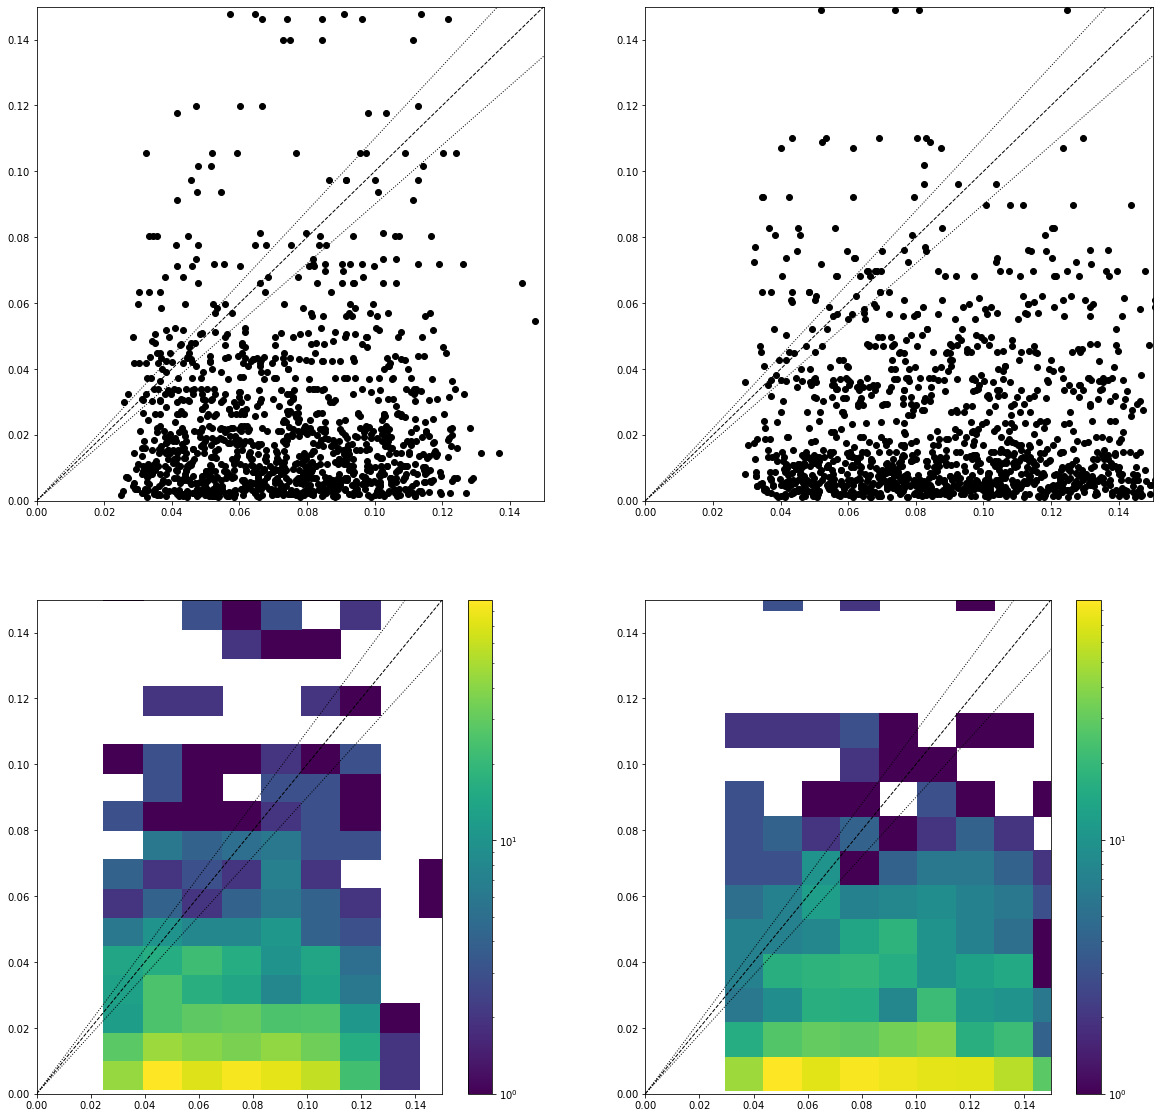

In [29]:
msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 0 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] > 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 23 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )

print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

[0 0 0 2 2 0 0 0 1 0 1 1 1 0 2 2 0 2 0 0 2 1 1 3 4 7 2 0 2 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
[0 0 1 1 1 1 1 1 0 0 2 1 3 0 2 1 1 0 0 2 2 1 1 0 2 4 0 0 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
y max. = 12.291502622129181


(0.0, 12.291502622129181)

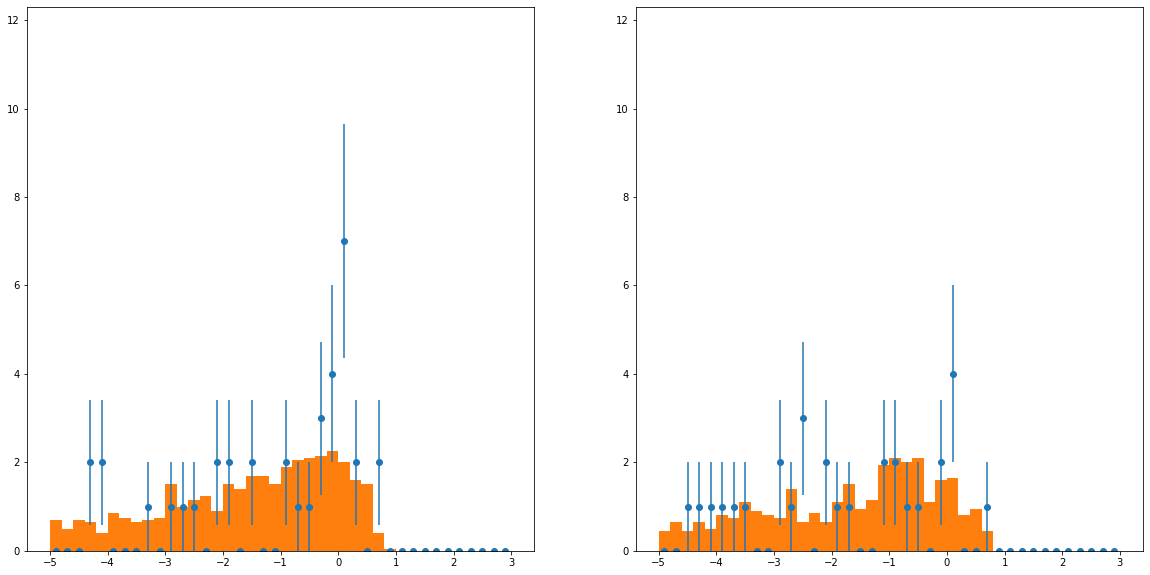

In [30]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 40
range_ = (-5.,3.)

#axes[0].hist( ( 1. - df_data[ "Xi" ][ msk1 ] / df_data[ "XiMuMuPlus" ][ msk1 ] ), bins=10, range=(-5.,3.), weights=weights_1 )
#axes[1].hist( ( 1. - df_data[ "Xi" ][ msk2 ] / df_data[ "XiMuMuMinus" ][ msk2 ] ), bins=10, range=(-5.,3.), weights=weights_2 )

vals_1 = ( 1. - df_data[ "Xi" ][ msk1_data ] / df_data[ "XiMuMuPlus" ][ msk1_data ] )
counts_1, bin_edges_1 = np.histogram( vals_1, bins=bins_, range=range_ )
#counts_1_w, _ = np.histogram( vals_1, bins=bins_, range=range_, weights=None )
#errors_1 = np.sqrt( counts_1 ) * ( counts_1_w / counts_1 )
errors_1 = np.sqrt( counts_1 )
print ( counts_1, bin_edges_1 )

bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#axes[0].errorbar(bin_centres_1, counts_1_w, yerr=errors_1, fmt='o')
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

vals_2 = ( 1. - df_data[ "Xi" ][ msk2_data ] / df_data[ "XiMuMuMinus" ][ msk2_data ] )
counts_2, bin_edges_2 = np.histogram( vals_2, bins=bins_, range=range_ )
#counts_2_w, _ = np.histogram( vals_2, bins=bins_, range=range_, weights=None )
#errors_2 = np.sqrt( counts_2 ) * ( counts_2_w / counts_2 )
errors_2 = np.sqrt( counts_2 )
print ( counts_2, bin_edges_2 )

bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
#axes[1].errorbar(bin_centres_2, counts_2_w, yerr=errors_2, fmt='o')
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df_bkg[ "Xi" ][ msk1_bkg ], ( 1./resample_factor ) )

vals_bkg_1 = ( 1. - df_bkg[ "Xi" ][ msk1_bkg ] / df_bkg[ "XiMuMuPlus" ][ msk1_bkg ] )
axes[0].hist( vals_bkg_1, bins=bins_, range=range_, weights=weights_1 )
axes[0].set_ylim( top=y_max )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df_bkg[ "Xi" ][ msk2_bkg ], ( 1./resample_factor ) )
    
vals_bkg_2 = ( 1. - df_bkg[ "Xi" ][ msk2_bkg ] / df_bkg[ "XiMuMuMinus" ][ msk2_bkg ] )
axes[1].hist( vals_bkg_2, bins=bins_, range=range_, weights=weights_2 )
axes[1].set_ylim( top=y_max )

In [31]:
#np.info( h5py.File )

5785     -1.711910e-05
39811     7.711315e-07
45170    -5.318766e-05
936       3.860024e-06
93817    -1.272517e-05
157144   -3.580272e-05
197500   -5.277169e-05
41932     2.561156e-06
131830   -4.784433e-05
207208    4.016943e-05
221452   -6.132064e-05
Name: ThY, dtype: float64
101961   -0.000036
47139     0.000098
102511    0.000096
183292    0.000053
254521   -0.000021
231920    0.000015
Name: ThY, dtype: float64
y max. = 12.291502622129181


(0.0, 12.291502622129181)

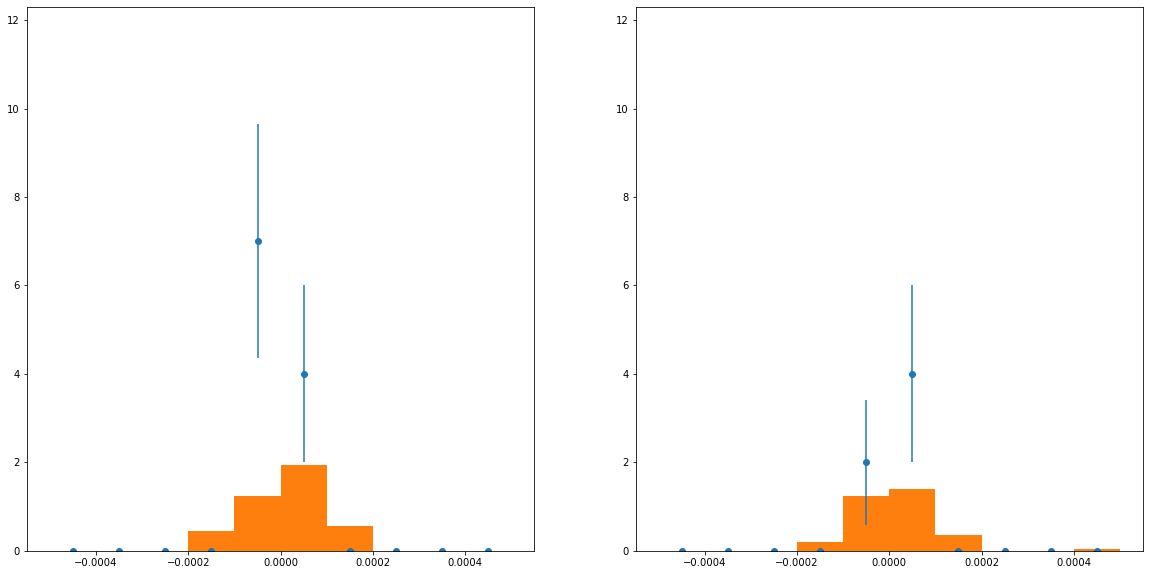

In [32]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

#var_ = "Xi"
#bins_ = 10
#range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

var_ = "ThY"
bins_ = 10
range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

#var_ = "Time"
#bins_ = 20
#range_ = (-0.5,0.5)

msk1_data_sel = ( vals_1 >= -0.20 ) & ( vals_1 <= +0.20 )
print ( df_data[ var_ ][ msk1_data ][ msk1_data_sel ] )

counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk1_data ][ msk1_data_sel ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

msk2_data_sel = ( vals_2 >= -0.20 ) & ( vals_2 <= +0.20 )
print ( df_data[ var_ ][ msk2_data ][ msk2_data_sel ] )

counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk2_data ][ msk2_data_sel ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

msk1_bkg_sel = ( vals_bkg_1 >= -0.20 ) & ( vals_bkg_1 <= +0.20 )
axes[0].hist( df_bkg[ var_ ][ msk1_bkg ][ msk1_bkg_sel ], bins=bins_, range=range_, weights=weights_1[ msk1_bkg_sel ] )
axes[0].set_ylim( top=y_max )

msk2_bkg_sel = ( vals_bkg_2 >= -0.20 ) & ( vals_bkg_2 <= +0.20 )
axes[1].hist( df_bkg[ var_ ][ msk2_bkg ][ msk2_bkg_sel ], bins=bins_, range=range_, weights=weights_2[ msk2_bkg_sel ] )
axes[1].set_ylim( top=y_max )